0        32.0
1         6.0
2         7.0
3         7.0
4         0.0
5         1.0
6         4.0
7        12.0
8         5.0
9         7.0
10        7.0
11        8.0
12        4.0
13       20.0
14       16.0
15       16.0
16       15.0
17       15.0
18       21.0
19       14.0
20      263.0
21       12.0
22       12.0
23       67.0
24       29.0
25        3.0
26       13.0
27       17.0
28       17.0
29       17.0
        ...  
4020      1.0
4021      1.0
4022      1.0
4023     16.0
4024      0.0
4025      0.0
4026      0.0
4027      1.0
4028      1.0
4029      1.0
4030      0.0
4031      0.0
4032      0.0
4033     24.0
4034      0.0
4035      0.0
4036      0.0
4037     19.0
4038     20.0
4039     24.0
4040     13.0
4041      2.0
4042      2.0
4043      7.0
4044      7.0
4045      0.0
4046      0.0
4047      0.0
4048      0.0
4049      1.0
dtype: float64
0       0.0
1      10.0
2       1.0
3      10.0
4      10.0
5       9.0
6       9.0
7       6.0
8      11.0
9       2.0
10      3.0

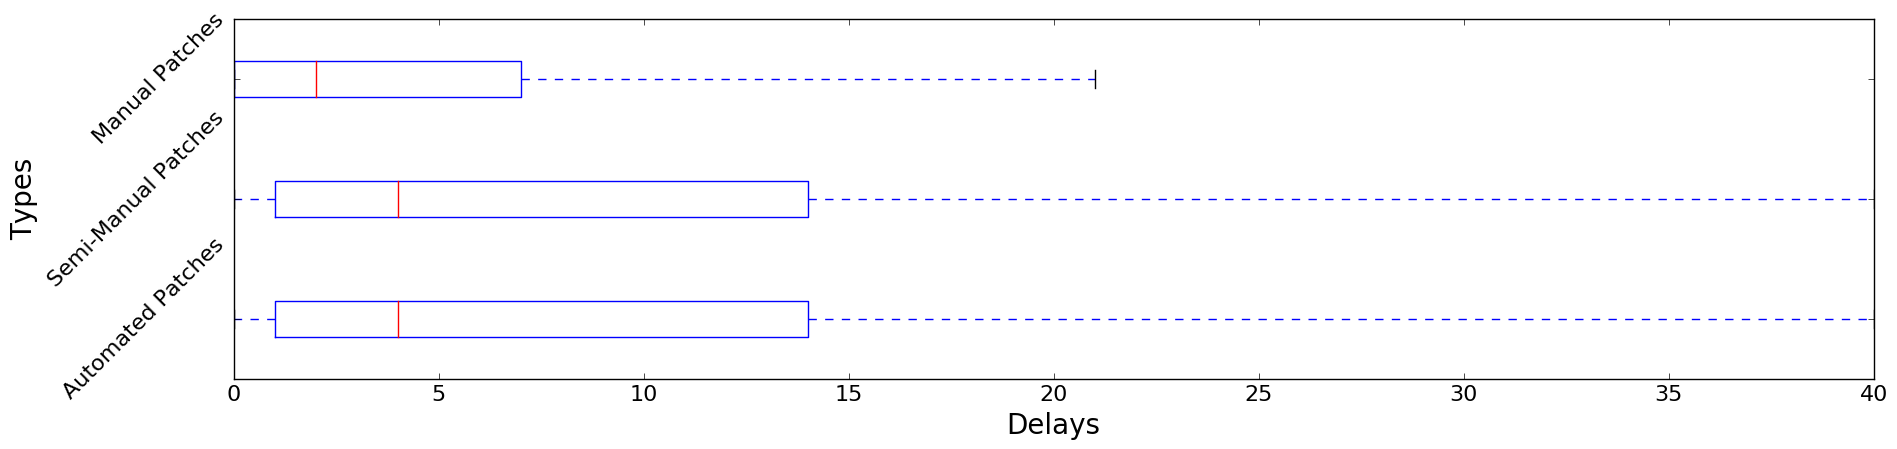

In [54]:
import ijson
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np


fileType1= 't1.json'
fileType2= 't2.json'
fileType3= 't3.json'

def datasetReader(filename):
    with open(filename, 'r') as f:
        objects = ijson.items(f, 'item')
        rows = list(objects)
    #print(rows[0])   
    return rows
def parse_full_date(row):
    date = datetime.datetime.utcfromtimestamp(int(row["authorDate"]))
    date = date.strftime("%Y%m%d")#%H%M%S")
    return date
def parse_full(row):
    date = datetime.datetime.utcfromtimestamp(int(row["committerDate"]))
    date = date.strftime("%Y%m%d")#%H%M%S")
    return date

def prepareDataFrame(ds , label):
    commits = pd.DataFrame.from_dict(ds)

    #change date format
    commits["authorDate"] = commits.apply(parse_full_date,axis=1)
    commits["committerDate"] = commits.apply(parse_full,axis=1)

    committerD = pd.to_datetime(commits["committerDate"], format="%Y%m%d")#%H%M%S" )
    authorD = pd.to_datetime(commits["authorDate"],format="%Y%m%d")#%H%M%S")
 
    daysDiff = committerD - authorD

    # present timedelta in dates 
    formattedDaysDiff = np.divide(daysDiff, np.timedelta64(1, 'D'))
    print(formattedDaysDiff)
    formattedDaysDiff.to_csv('issta_commitDelays'+ label +'.csv')
    y = formattedDaysDiff.values
   
    x = formattedDaysDiff.index.values
    
    #print(np.median(y))
    
    
    return x,y
    

def commitsDelays(ds1, ds2,ds3, outlier = True):
    x1,y1 = prepareDataFrame(ds1, 'H')
    x2,y2 = prepareDataFrame(ds2, 'DLH')
    x3,y3 = prepareDataFrame(ds3, 'HMG')
    
    print x1,y1
    
    '''
    print(np.amax(y1) )
    print(np.amin(y1) )
    print(np.amax(y2) )
    print(np.amin(y2) )
    print(np.amax(y3) )
    print(np.amin(y3) )

    
    '''

    y = [y1,y2,y3]
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        ax1.boxplot(y, 0, 'rs', 0, 2)
    else:
        ax1.boxplot(y, 0, '', 0, 2)

    
    #ax1.grid(True)#, color='g' , linestyle ='-')

    varLabels = ['Automated Patches', 'Semi-Manual Patches', 'Manual Patches']
    
    ax1.set_yticklabels(varLabels, rotation=45)
    
    if outlier == True:
        ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
        ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('Delays',fontsize=20)
    plt.ylabel('Types',fontsize=20)
    #plt.title("Commit delays -Author dates committer dates difference",fontsize=20)
    plt.tick_params(labelsize=16)
    
    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    
    plt.subplots_adjust(left=0.16,bottom=0.18,right=0.98, top=0.90 , wspace= 0.1, hspace=0)
    #plt.legend(bbox_to_anchor=(0.15, 1), loc=0, borderaxespad=0., fontsize=18)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(20,5, forward=True)
    
    '''plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(42.5,5.5, forward=True)'''
    
    if outlier == True:
        plt.savefig("CommitDelays.pdf",dpi=100)
    else:
        plt.savefig("CommitDelaysWithOutliers.pdf",dpi=100)
    
def commitsDelaysType(ds1, typ, outlier = True):
    x1,y1 = prepareDataFrame(ds1)



    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    
    if outlier == True:
        ax1.boxplot(y1, 0, 'rs', 0)
    else:
        ax1.boxplot(y1, 0, '', 0 )

    
    ax1.grid(True)#, color='g' , linestyle ='-')

    ax1.set_yticklabels([typ])
    #ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('Delays')
    
    plt.title("Commit delays -Author dates committer dates difference")

    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    

    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(22.5,5.5, forward=True)
    if outlier == True:
        plt.savefig(typ+"CommitDelays.png",dpi=100)
    else:
        plt.savefig(typ+"CommitDelaysWithOutliers.png",dpi=100)
    
    
if __name__ == '__main__':
    dsType1 = datasetReader(fileType1)
    dsType2 = datasetReader(fileType2)
    dsType3 = datasetReader(fileType3)
    
    #x1,y1 = prepareDataFrame(dsType1)
    '''commitsDelaysType(dsType1,'Type1',False)
    commitsDelaysType(dsType1,'Type1')
    commitsDelaysType(dsType2,'Type2',False)
    commitsDelaysType(dsType2,'Type2')
    commitsDelaysType(dsType3,'Type3',False)
    commitsDelaysType(dsType3,'Type3')
    commitsDelays(dsType1,dsType2,dsType3)'''
    commitsDelays(dsType1,dsType2,dsType3,False)
    #temporalDistOfCommits(dsType2,'Type2')
    #temporalDistOfCommits(dsType3,'Type3')


In [17]:
commits1 = pd.DataFrame.from_dict(dsType1)
commits2 = pd.DataFrame.from_dict(dsType2)
commits3 = pd.DataFrame.from_dict(dsType3)

In [25]:
commits

,author,authorDate,commit,committer,committerDate,committerEmail,email,message,parents,paths,tree
0,Lorenzo Stoakes,1473634465,38e088546522e1e86d2b8f401a1354ad3a9b3303,Linus Torvalds,1474843422,torvalds@linux-foundation.org,lstoakes@gmail.com,mm-check-VMA-flags-to-avoid-invalid-PROT_NONE-...,831e45d,"[{u'deletions': u'3', u'path': u'mm/huge_memor...",3e7144e
1,Ville Syrjälä,1473758539,ea54ff4008892b46c7a3e6bc8ab8aaec9d198639,Jani Nikula,1473841505,jani.nikula@intel.com,ville.syrjala@linux.intel.com,drm-i915-Ignore-OpRegion-panel-type-except-on-...,86dfb76,"[{u'deletions': u'0', u'path': u'drivers/gpu/d...",cd22e3d
2,Kees Cook,1473267274,8e1f74ea02cf4562404c48c6882214821552c13f,Kees Cook,1473273206,keescook@chromium.org,keescook@chromium.org,usercopy-remove-page-spanning-test-for-now,a85d6b8,"[{u'deletions': u'26', u'path': u'mm/usercopy....",931135d
3,Chris Wilson,1472209166,fc2780b66b15092ac68272644a522c1624c48547,Jani Nikula,1473259243,jani.nikula@intel.com,chris@chris-wilson.co.uk,drm-i915-Add-GEN7_PCODE_MIN_FREQ_TABLE_GT_RATI...,557b1a8,"[{u'deletions': u'0', u'path': u'drivers/gpu/d...",37820f9
4,Giedrius Statkevičius,1472752022,e34f2ff40e0339f6a379e1ecf49e8f2759056453,Kalle Valo,1473254464,kvalo@qca.qualcomm.com,giedrius.statkevicius@gmail.com,ath9k-bring-back-direction-setting-in-ath9k_-s...,db7b542,"[{u'deletions': u'2', u'path': u'drivers/net/w...",11fe075
5,Bjorn Helgaas,1472737949,6af7e4f77259ee946103387372cb159f2e99a6d4,Bjorn Helgaas,1472737949,bhelgaas@google.com,bhelgaas@google.com,PCI-Mark-Haswell-Power-Control-Unit-as-having-...,21c80c9,"[{u'deletions': u'7', u'path': u'arch/x86/pci/...",bd17c2d
6,Michael Ellerman,1470432353,c012268b37db6b10b59dac9b7f45956cb9a8bcb2,Greg Kroah-Hartman,1472641958,gregkh@linuxfoundation.org,mpe@ellerman.id.au,lkdtm-Mark-lkdtm_rodata_do_nothing-notrace,8c57cac,"[{u'deletions': u'1', u'path': u'drivers/misc/...",ab4afbf
7,Arik Nemtsov,1472463455,554d072e7bc3e56de5893c8181110a547b2062c9,Johannes Berg,1472537021,johannes.berg@intel.com,arik@wizery.com,mac80211-TDLS-don-t-require-beaconing-for-AP-BW,4d0bd46,"[{u'deletions': u'3', u'path': u'net/mac80211/...",5c71c6f
8,Alex Deucher,1472058255,611a1507fe8569ce1adab3abc982ea58ab559fb9,Alex Deucher,1472061878,alexander.deucher@amd.com,alexander.deucher@amd.com,drm-amdgpu-skip-TV-CV-in-display-parsing,e1718d9,"[{u'deletions': u'0', u'path': u'drivers/gpu/d...",288afb5
9,Alex Deucher,1472056296,e1718d97aa88ea44a6a8f50ff464253dd0dacf01,Alex Deucher,1472061864,alexander.deucher@amd.com,alexander.deucher@amd.com,drm-amdgpu-avoid-a-possible-array-overflow,56615387,"[{u'deletions': u'0', u'path': u'drivers/gpu/d...",d168d3c


In [30]:
c1 = commits1[['commit','author','email','authorDate','committer','committerEmail','committerDate','paths']]
c1.rename(columns={'commit': 'sha', 'email': 'authorEmail'}, inplace=True)
c1['type'] = 'H'

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
c2 = commits2[['commit','author','email','authorDate','committer','committerEmail','committerDate','paths']]
c2.rename(columns={'commit': 'sha', 'email': 'authorEmail'}, inplace=True)
c2['type'] = 'DLH'

c3 = commits3[['commit','author','email','authorDate','committer','committerEmail','committerDate','paths']]
c3.rename(columns={'commit': 'sha', 'email': 'authorEmail'}, inplace=True)
c3['type'] = 'HMG'

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
frames = [c1, c2, c3]
result = pd.concat(frames,ignore_index=True)

In [47]:
r = result[['sha','author','authorEmail','authorDate','committer','committerEmail','committerDate','paths','type']]
r.rename(columns={'paths': 'files'}, inplace=True)

In [44]:
rawDf = result[['sha','author','authorEmail','authorDate','committer','committerEmail','committerDate','type']]

In [50]:
r.to_csv('issta_raw.csv',encoding='utf-8',index=False)